## Sales Prediction 

Importing the required libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [7]:
df = pd.read_csv("C:\\Users\\sulai\\Downloads\\RD INFRO TECHNOLOGY\\Sales prediction\\advertising.csv")

In [9]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [15]:
# Check for duplicated rows
print("\nDuplicated values in the dataset:")
print(df.duplicated().sum())


Duplicated values in the dataset:
0


In [17]:
# Summary statistics
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


Text(0, 0.5, 'Frequency')

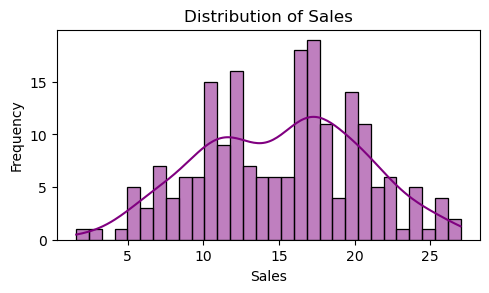

In [32]:
# Distribution of the target variable (Sales)

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['Sales'], bins=30, kde=True, color='purple')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')

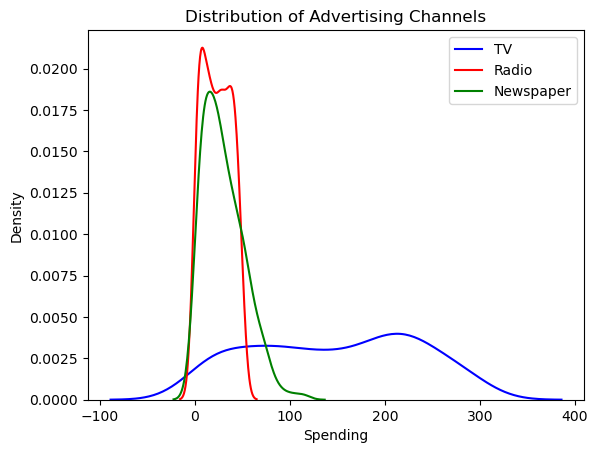

In [34]:
# Distribution of each advertising channel

plt.subplot(1, 1, 1)
sns.kdeplot(df['TV'], label='TV', color='blue')
sns.kdeplot(df['Radio'], label='Radio', color='red')
sns.kdeplot(df['Newspaper'], label='Newspaper', color='green')
plt.title('Distribution of Advertising Channels')
plt.xlabel('Spending')
plt.ylabel('Density')
plt.legend()
plt.show()

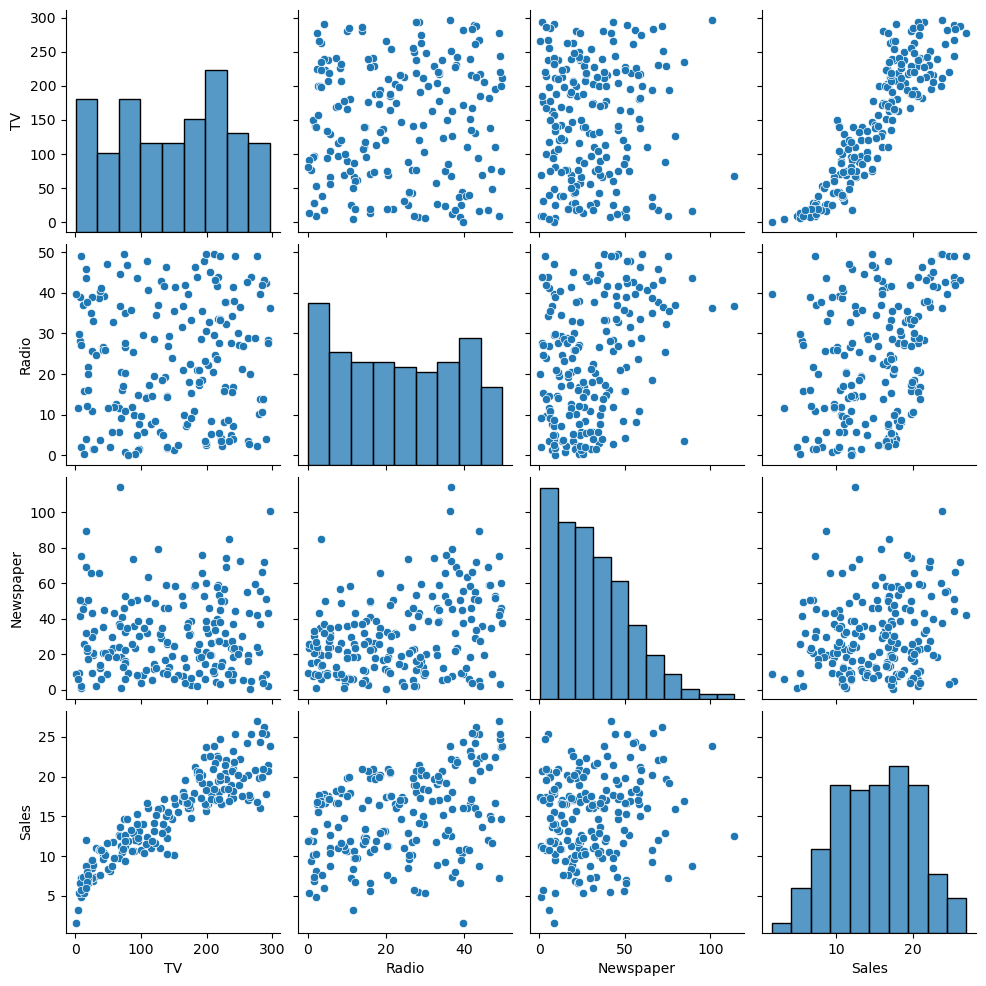

In [19]:
# Pairplot to visualize relationships
sns.pairplot(df)
plt.show()

**Checking Relationship between Sales and TV**

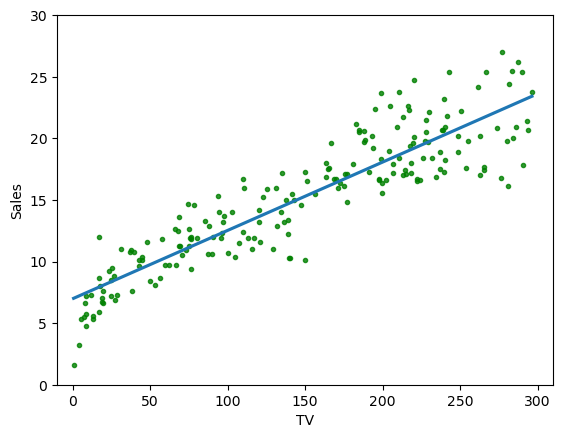

In [22]:
sns.regplot(x='TV',y='Sales',data=df,order=1,ci=None,scatter_kws={'color':'g','s':9}) # 's':9 denotes the size of dots.
plt.xlim(-10,310)
plt.ylim(0,30)
plt.show()

**Checking Relationship between Sales and Radio**

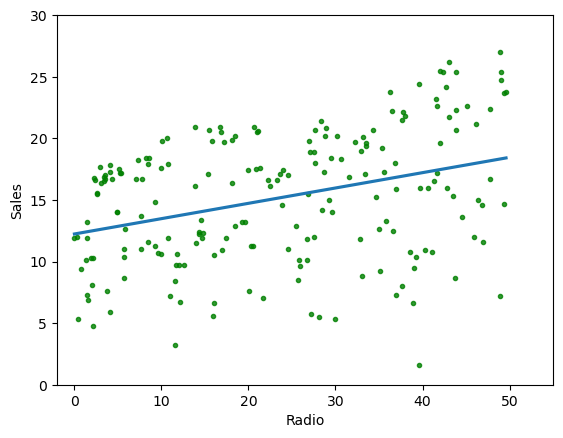

In [25]:
sns.regplot(x='Radio',y='Sales',data=df,order=1,ci=None,scatter_kws={'color':'g','s':9})
plt.xlim(-2,55)
plt.ylim(0,30)
plt.show()


**Checking The Relationship between Sales and Newspaper**

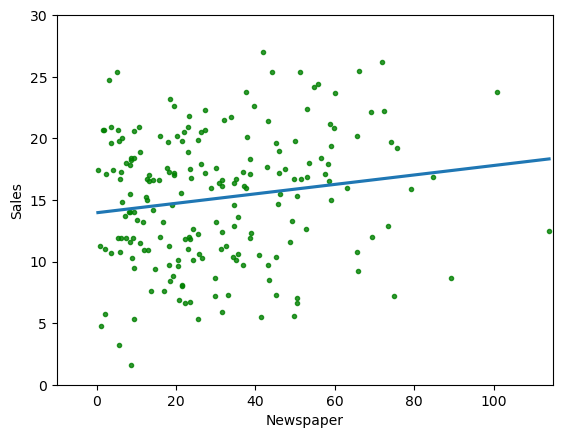

In [30]:
# Checking Relationship between Sales and Newspaper
sns.regplot(x='Newspaper', y='Sales', data=df, order=1, ci=None, scatter_kws={'color':'g', 's':9})   # 's':9 denotes the size of dots. 
plt.xlim(-10, 115)                                                                 
plt.ylim(0, 30)                    # y-axis values start from 0 
plt.show() 

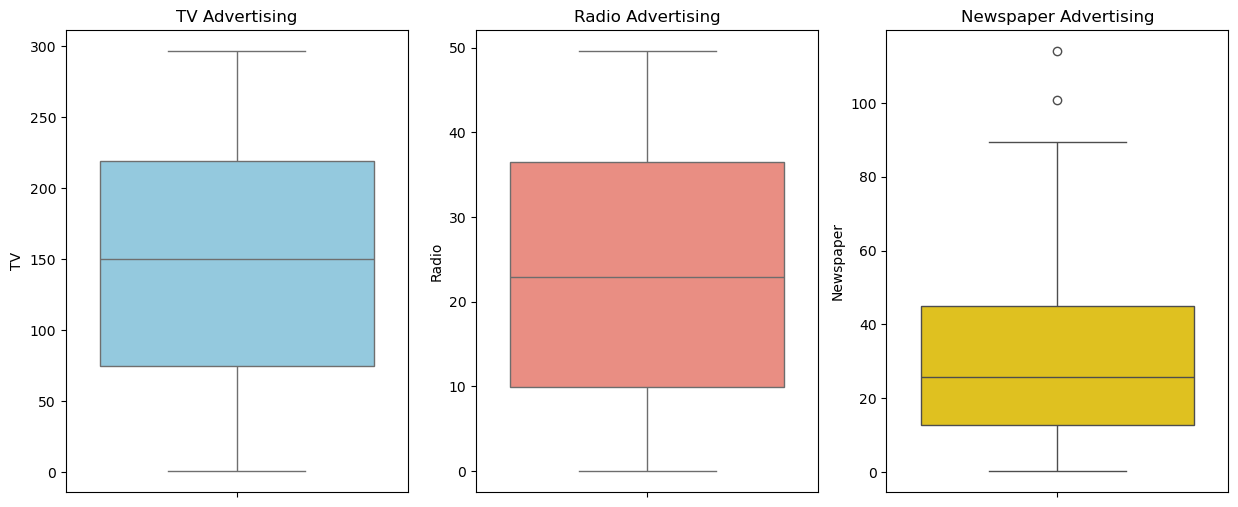

In [38]:
# Boxplot for each advertising channel

plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
sns.boxplot(y='TV', data=df, color='skyblue')
plt.title('TV Advertising')

plt.subplot(1, 3, 2)
sns.boxplot(y='Radio', data=df, color='salmon')
plt.title('Radio Advertising')

plt.subplot(1, 3, 3)
sns.boxplot(y='Newspaper', data=df, color='gold')
plt.title('Newspaper Advertising')

plt.show()

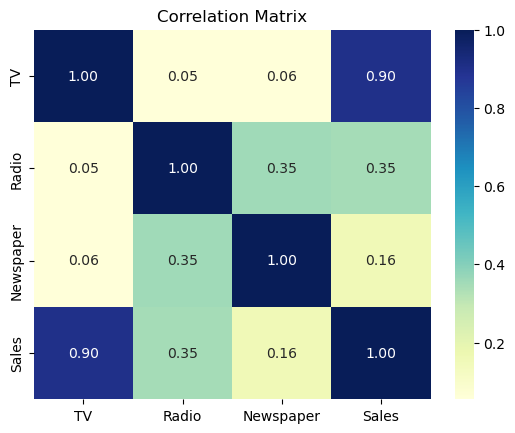

In [36]:
# Correlation matrix

correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [40]:
#scale the features
features = ['TV', 'Radio', 'Newspaper']
scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])
df.head()

,TV,Radio,Newspaper,Sales
0,0.775786,0.762097,0.605981,22.1
1,0.148123,0.792339,0.394019,10.4
2,0.055800,0.925403,0.606860,12.0
3,0.509976,0.832661,0.511873,16.5
4,0.609063,0.217742,0.510994,17.9


In [42]:
X = df.drop('Sales', axis=1)
y = df['Sales']

In [44]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Initialize different regression models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regressor": SVR()
}

# Dictionary to store results
results = {}

In [48]:
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    results[name] = {'MSE':mse, 'R-Squared': r2}

results_df = pd.DataFrame(results).T
print(results_df)

                                MSE  R-Squared
Linear Regression          2.907757   0.905901
Ridge Regression           3.094442   0.899860
Lasso Regression          20.710157   0.329792
ElasticNet Regression     27.566398   0.107915
Decision Tree              2.767000   0.910456
Random Forest              1.333163   0.956857
Gradient Boosting          1.230246   0.960188
Support Vector Regressor   3.470141   0.887702


In this case, Gradient Boosting has the lowest MSE (1.244662) and a high R-squared (0.959721), making it likely the best model among those tested.

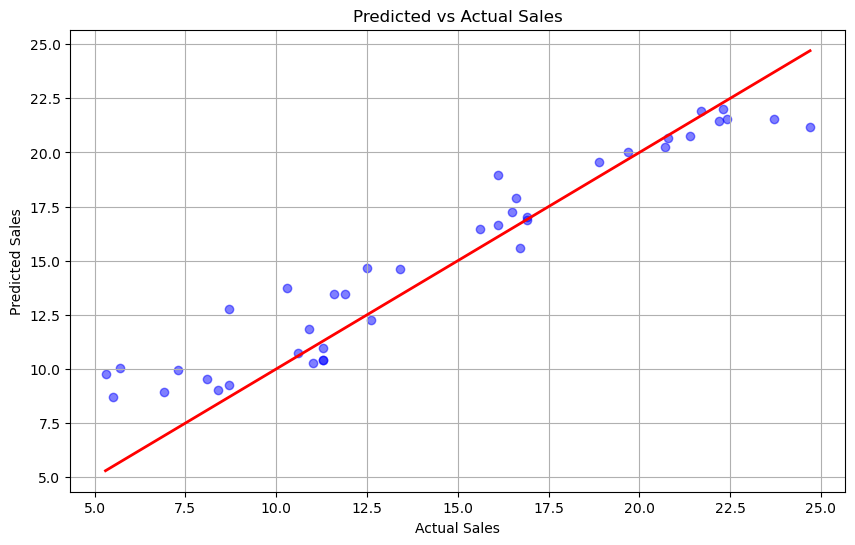

In [53]:
import matplotlib.pyplot as plt
# Assuming 'y_test' is the actual values and 'y_pred' is the predicted values from the best model
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred,color='blue',alpha=0.5)
plt.plot([min(y_test),max(y_test)] , [min(y_test), max(y_test)],color='red',linewidth=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Predicted vs Actual Sales')
plt.grid(True)
plt.show()
